In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

In [3]:
csvFile = open("ratings.csv", "r")
reader = csv.reader(csvFile)
data_set = []
index = 0
for elem in reader:
    if index == 0:
        index = index + 1
        continue
    if index < 1000001:
        data_set.append(elem[0].split("\t")[1:4])
        index = index + 1
    else:
        break

In [4]:
print(f"Total Number of data: {len(data_set)}")

Total Number of data: 1000000


In [27]:
csvFile_1 = open("movies.csv", "r", encoding='latin-1' )
movies = defaultdict(str)
reader = csv.reader(csvFile_1)
index = 0
for elem in reader:
    if index == 0:
        index = index + 1
        continue
    else:
        movies[int(elem[0].split("\t")[1])] = elem[0].split("\t")[2]

In [28]:
print (f"Total Number of movies: {len(movies)}")

Total Number of movies: 3883


In [9]:
# user_ID, Item_ID, Rating
print (data_set[0])

['1', '1193', '5']


In [10]:
# split the data into training_set (90%) and validation_set(10%)
training_set = []
validation_set = []
i = 1
for elem in data_set:
    if i <= 900000:
        training_set.append([int(elem_u) for elem_u in elem])
        i = i + 1
    elif i <= 1000000:
        validation_set.append([int(elem_u) for elem_u in elem])
        i = i + 1

In [11]:
print (len(training_set))

900000


In [12]:
print (len(validation_set))

100000


In [13]:
# We have build our training data and validation data
user = defaultdict(list)
item = defaultdict(list)
for elem in training_set:
    item_R = []
    user_R = []
    user_R.append(elem[0])
    user_R.append(elem[2])
    item_R.append(elem[1])
    item_R.append(elem[2])
    user[elem[0]].append(item_R)
    item[elem[1]].append(user_R)

In [14]:
print (user[1])

[[1193, 5], [661, 3], [914, 3], [3408, 4], [2355, 5], [1197, 3], [1287, 5], [2804, 5], [594, 4], [919, 4], [595, 5], [938, 4], [2398, 4], [2918, 4], [1035, 5], [2791, 4], [2687, 3], [2018, 4], [3105, 5], [2797, 4], [2321, 3], [720, 3], [1270, 5], [527, 5], [2340, 3], [48, 5], [1097, 4], [1721, 4], [1545, 4], [745, 3], [2294, 4], [3186, 4], [1566, 4], [588, 4], [1907, 4], [783, 4], [1836, 5], [1022, 5], [2762, 4], [150, 5], [1, 5], [1961, 5], [1962, 4], [2692, 4], [260, 4], [1028, 5], [1029, 5], [1207, 4], [2028, 5], [531, 4], [3114, 4], [608, 4], [1246, 4]]


In [15]:
print (item[1193])

[[1, 5], [2, 5], [12, 4], [15, 4], [17, 5], [18, 4], [19, 5], [24, 5], [28, 3], [33, 5], [39, 5], [42, 3], [44, 4], [47, 4], [48, 4], [49, 4], [53, 5], [54, 5], [58, 5], [59, 4], [62, 4], [80, 4], [81, 5], [88, 5], [89, 5], [95, 5], [96, 3], [99, 2], [102, 5], [104, 2], [107, 5], [109, 2], [120, 5], [123, 5], [131, 5], [136, 4], [139, 4], [146, 4], [150, 5], [151, 4], [155, 5], [166, 5], [169, 5], [175, 5], [178, 4], [180, 5], [190, 5], [191, 3], [192, 4], [195, 5], [196, 4], [202, 4], [206, 1], [208, 5], [216, 4], [224, 4], [225, 4], [227, 4], [230, 4], [231, 4], [235, 5], [236, 5], [242, 4], [245, 4], [259, 5], [261, 5], [264, 4], [265, 5], [266, 5], [270, 5], [272, 4], [281, 5], [285, 4], [287, 5], [291, 4], [292, 5], [293, 5], [294, 4], [295, 4], [297, 5], [299, 5], [300, 5], [301, 5], [306, 5], [307, 5], [308, 4], [309, 4], [312, 4], [314, 3], [315, 5], [317, 4], [318, 4], [319, 5], [326, 3], [327, 5], [329, 4], [331, 4], [332, 5], [333, 3], [334, 5], [335, 3], [339, 5], [340, 3],

In [16]:
def inner_multiply(x, y):
    return sum([x[i]*y[i] for i in range(len(x))])

# K-Latent Factor Model

## 1. Loss Function

In [18]:
def ObjectFunction(alpha, beta_u, beta_i, gamma_u, gamma_i, lam, training_set, user, item):
    res = 0
    for elem in training_set:
        res = res + (alpha + beta_u[elem[0]] + beta_i[elem[1]] + inner_multiply(gamma_u[elem[0]], gamma_i[elem[1]]) - elem[2])**2
    for elem in user:
        res = res + lam*beta_u[elem] * beta_u[elem]
        res = res + lam*sum([unit_gamma_u*unit_gamma_u for unit_gamma_u in gamma_u[elem]])
    for elem in item:
        res = res + lam*beta_i[elem] * beta_i[elem]
        res = res + lam*sum([unit_gamma_i*unit_gamma_i for unit_gamma_i in gamma_i[elem]])
    return res

## 2. Prime Function

In [19]:
def ObjectPrime(alpha, beta_u, beta_i, gamma_u, gamma_i, lam, training_set, user, item):
    res = []
    d_alpha = 0
    d_beta_u = defaultdict(int)
    d_beta_i = defaultdict(int)
    d_gamma_u = defaultdict(list)
    d_gamma_i = defaultdict(list)
    for elem in training_set:
        d_alpha = alpha + 2*(beta_u[elem[0]] + beta_i[elem[1]] + inner_multiply(gamma_u[elem[0]], gamma_i[elem[1]])-elem[2])
    for key_u in beta_u:
        d_beta_u[key_u] = 0
        for item_unit in user[key_u]:
            d_beta_u[key_u] = d_beta_u[key_u] + 2*(alpha + beta_u[key_u] + beta_i[item_unit[0]] + inner_multiply(gamma_u[key_u], gamma_i[item_unit[0]])-item_unit[1])
        d_beta_u[key_u] = d_beta_u[key_u] + 2*lam*beta_u[key_u]
    for key_i in beta_i:
        d_beta_i[key_i] = 0
        for user_unit in item[key_i]:
            d_beta_i[key_i] = d_beta_i[key_i] + 2*(alpha + beta_u[user_unit[0]] + beta_i[key_i] + inner_multiply(gamma_u[user_unit[0]], gamma_i[key_i]) - user_unit[1])
        d_beta_i[key_i] = d_beta_i[key_i] + 2*lam*beta_i[key_i]
    for user_unit in gamma_u:
        unit_gamma_u = [0]*len(gamma_u[user_unit])
        for i in range(len(gamma_u[user_unit])):
            for item_unit in user[user_unit]:
                unit_gamma_u[i] = unit_gamma_u[i] + 2*(alpha+beta_u[user_unit]+beta_i[item_unit[0]]+inner_multiply(gamma_u[user_unit], gamma_i[item_unit[0]])-item_unit[1])*gamma_i[item_unit[0]][i]
            unit_gamma_u[i] = unit_gamma_u[i] + 2*lam*gamma_u[user_unit][i]
        d_gamma_u[user_unit] = unit_gamma_u
    for item_unit in gamma_i:
        unit_gamma_i = [0]*len(gamma_i[item_unit])
        for i in range(len(gamma_i[item_unit])):
            for user_unit in item[item_unit]:
                unit_gamma_i[i] = unit_gamma_i[i] + 2*(alpha+beta_u[user_unit[0]]+beta_i[item_unit]+inner_multiply(gamma_u[user_unit[0]], gamma_i[item_unit])-user_unit[1])*gamma_u[user_unit[0]][i]
            unit_gamma_i[i] = unit_gamma_i[i] + 2*lam*gamma_i[item_unit][i]
        d_gamma_i[item_unit] = unit_gamma_i   
    res.append(d_alpha)
    res.append(d_beta_u)
    res.append(d_beta_i)
    res.append(d_gamma_u)
    res.append(d_gamma_i)
    return res

## 3. Update Cofficient

In [20]:
def updateParameter(d_res, lr, alpha, beta_u, beta_i, gamma_u, gamma_i):
    coff = []
    alpha = alpha - lr*d_res[0]
    for key_u in beta_u:
        beta_u[key_u] = beta_u[key_u] - lr*d_res[1][key_u]
    for key_i in beta_i:
        beta_i[key_i] = beta_i[key_i] - lr*d_res[2][key_i]
    for user_unit in gamma_u:
        for i in range(len(gamma_u[user_unit])):
            gamma_u[user_unit][i] = gamma_u[user_unit][i] - lr*d_res[3][user_unit][i]
    for item_unit in gamma_i:
        for i in range(len(gamma_i[item_unit])):
            gamma_i[item_unit][i] = gamma_i[item_unit][i] - lr*d_res[4][item_unit][i]
    coff.append(alpha)
    coff.append(beta_u)
    coff.append(beta_i)
    coff.append(gamma_u)
    coff.append(gamma_i)
    return coff

## 4. Initialize parameter
* lambda 5.0
* learning rate 0.0001

In [21]:
coff = []
lam = 5.0
lr = 0.0001
beta_u = defaultdict(int)
beta_i = defaultdict(int)
alpha = 0
gamma_u = defaultdict(list)
gamma_i = defaultdict(list)
for key_u in user:
    beta_u[key_u] = 0
    gamma_u[key_u] = np.random.randn(3).tolist()
for key_i in item:
    beta_i[key_i] = 0
    gamma_i[key_i] = np.random.randn(3).tolist()
coff.append(alpha)
coff.append(beta_u)
coff.append(beta_i)
coff.append(gamma_u)
coff.append(gamma_i)

## 5. Training Function

In [22]:
# training process
def train(iteration_num, coff, lam, lr, training_set, user, item):
    res_list = []
    for i in range(iteration_num):
        res = ObjectFunction(coff[0], coff[1], coff[2], coff[3], coff[4], lam, training_set, user, item)
#         if (res < 100000):
#             lr = lr*0.99
# learning rate decay
        if i%10 == 0:
            print (f"MSE = {res}")
            res_list.append(res)
        d_res = ObjectPrime(coff[0], coff[1], coff[2], coff[3], coff[4], lam, training_set, user, item)
        coff = updateParameter(d_res, lr, coff[0], coff[1], coff[2], coff[3], coff[4])
    number_of_samples = range(0, int(iteration_num/10))
    plt.title('Recommendation System on latent factor model')
    plt.xlabel('Number of samples')
    plt.ylabel('MSE error')
    plt.plot(number_of_samples, res_list, color='blue')
    plt.show()
    return coff

MSE = 15539578.959172301
MSE = 2207884.755499663
MSE = 1531759.8844087156
MSE = 1295628.999601202
MSE = 1174812.4674454199
MSE = 1101825.9120389777
MSE = 1053264.3452109175
MSE = 1018824.9666623243
MSE = 993259.0811234695
MSE = 973611.4702340012
MSE = 958092.2802903221
MSE = 945555.485696351
MSE = 935234.4445333332
MSE = 926597.8079213303
MSE = 919266.3424994543
MSE = 912962.5865332583
MSE = 907479.1484802612
MSE = 902658.0625597778
MSE = 898376.9503530766
MSE = 894539.507771978
MSE = 891068.8183309569
MSE = 887902.55896306
MSE = 884989.5013020816
MSE = 882286.9180441132
MSE = 879758.6345150594
MSE = 877373.5502293154
MSE = 875104.5116152645
MSE = 872927.4556266705
MSE = 870820.7708653536
MSE = 868764.8417589348
MSE = 866741.7542279239
MSE = 864735.1489587019
MSE = 862730.2109559957
MSE = 860713.7812236103
MSE = 858674.5682011014
MSE = 856603.4238550088
MSE = 854493.634610912
MSE = 852341.1650434288
MSE = 850144.7882306885
MSE = 847906.0462733555
MSE = 845629.0098620931
MSE = 843319.84

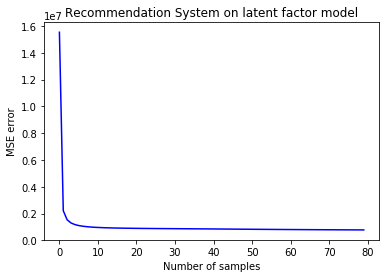

In [38]:
coff = train(800, coff, lam, lr, training_set, user, item)

## 6. Compute RMSE on Validation dataset

In [49]:
def computeMSE(coff, validation_set):
    res = []
    real_label = []
    for elem in validation_set:
        if elem[0] in coff[1] and elem[1] in coff[2]:
            unit_res = coff[0] + coff[1][elem[0]] + coff[2][elem[1]] + inner_multiply(coff[3][elem[0]], coff[4][elem[1]])
            if unit_res > 5:
                res.append(5)
            else:
                res.append(unit_res)
            real_label.append(elem[2])
    return (sum([abs(res[i] - real_label[i])**2 for i in range(len(res))])/len(res))**(1/2)

In [51]:
print (computeMSE(coff, validation_set))

0.8375718995424994


store the cofficient to local

In [52]:
f = open("localcoff.txt","w")
for elem in coff:
    f.write(str(elem)+"\n")
f.close()

## 7. Make Prediction
* Predict the socres user would give on items that not seen before and generating one rating list
* Return the top 30 high score items 

### 7.1 Select those item that user did not buy before

In [59]:
# Use the features trained above
def MakePredictionOnUser(user_index, item, movies, coff):
    not_seen = []
    user_seen = [elem[0] for elem in user[user_index]]
    for elem in item:
        if elem not in user_seen:
            not_seen.append(elem)
    predict_rating = {elem : coff[0] + coff[1][user_index] + coff[2][elem] + inner_multiply(coff[3][user_index], coff[4][elem]) for elem in not_seen}
    # sort the items on scores
    counts_w = [(predict_rating[w], w) for w in predict_rating]
    counts_w.sort()
    counts_w.reverse()
    # Display 30 movies with highest ratings
    res = {movies[elem[1]] : elem[0] for elem in counts_w}
    return res

### 7.2 Print out those items and corresponding scores

In [60]:
res = MakePredictionOnUser(1, item, movies, coff)

In [61]:
res

{'Shawshank Redemption': 4.937799123792254,
 'Raiders of the Lost Ark (1981)': 4.7990836160115045,
 'Usual Suspects': 4.73251760317109,
 'Braveheart (1995)': 4.718262248819699,
 'Matrix': 4.713783604532479,
 'Silence of the Lambs': 4.6534274832512486,
 'Forrest Gump (1994)': 4.6362434175879494,
 'Life Is Beautiful (La Vita è bella) (1997)': 4.624831467735708,
 'Gladiator (2000)': 4.624238831367129,
 'Green Mile': 4.617087658546138,
 'Good Will Hunting (1997)': 4.592673483430108,
 'American History X (1998)': 4.592189900071767,
 'Great Escape': 4.591501271544568,
 'Sting': 4.59030247188542,
 'Star Wars: Episode V - The Empire Strikes Back (1980)': 4.587396266599155,
 'Indiana Jones and the Last Crusade (1989)': 4.587118831514678,
 'Godfather': 4.579367971683074,
 'Wrong Trousers': 4.573828078669814,
 'Die Hard (1988)': 4.568622090110024,
 'Glory (1989)': 4.5482327920889345,
 'Bridge on the River Kwai': 4.539070810925452,
 'Patton (1970)': 4.50113705281504,
 'Fugitive': 4.485949053027871

## 8. Key Word Visualize

In [53]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [62]:
movie_title = [elem for elem in res]

In [63]:
print (' '.join(movie_title[:50]))

Shawshank Redemption Raiders of the Lost Ark (1981) Usual Suspects Braveheart (1995) Matrix Silence of the Lambs Forrest Gump (1994) Life Is Beautiful (La Vita è bella) (1997) Gladiator (2000) Green Mile Good Will Hunting (1997) American History X (1998) Great Escape Sting Star Wars: Episode V - The Empire Strikes Back (1980) Indiana Jones and the Last Crusade (1989) Godfather Wrong Trousers Die Hard (1988) Glory (1989) Bridge on the River Kwai Patton (1970) Fugitive October Sky (1999) Terminator Star Wars: Episode VI - Return of the Jedi (1983) Monty Python and the Holy Grail (1974) 12 Angry Men (1957) Terminator 2: Judgment Day (1991) Cinema Paradiso (1988) Lawrence of Arabia (1962) Butch Cassidy and the Sundance Kid (1969) Casablanca (1942) Hunt for Red October It's a Wonderful Life (1946) Rear Window (1954) Few Good Men Maltese Falcon Stand by Me (1986) Outlaw Josey Wales Animal House (1978) North by Northwest (1959) Lethal Weapon (1987) Almost Famous (2000) Seven (Se7en) (1995) Wh

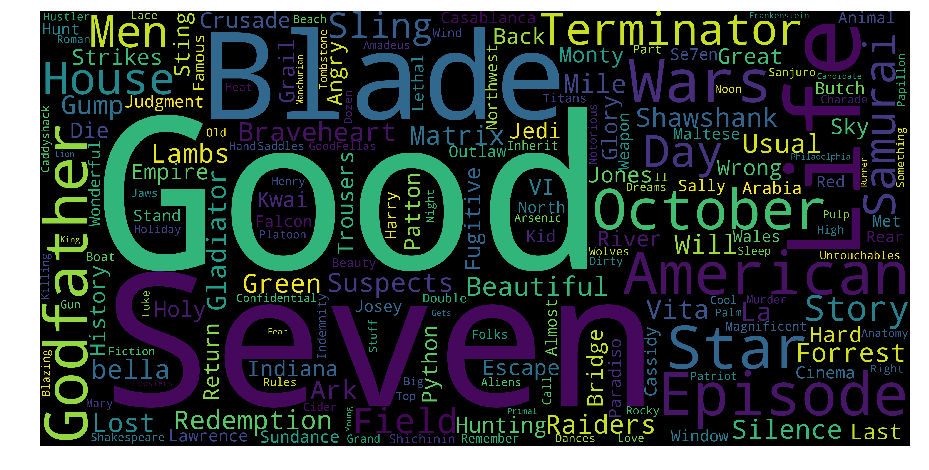

In [64]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(' '.join(movie_title[:100]))
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## 9. Purchase Prediction

In [84]:
correct = 0
sumall = 0
f = open("testdata.txt")
while 1:
    line = f.readline().strip()
    if not line:
        break
    user_index = int(line.split("-")[0])
    item_index = int(line.split("-")[1])
    but_flag = int(line.split("-")[2])
    score = coff[0] + coff[1][user_index] + coff[2][item_index] + inner_multiply(coff[3][user_index], coff[4][item_index])
    if score > 4.5 and but_flag == 1:
        correct += 1
    if score < 4.5 and but_flag == 0:
        correct += 1
    sumall += 1
print (f"Prediction Acc: {correct/sumall}")

Prediction Acc: 0.47054931173114906
